
--- Step 1 ---
✅ No conflicts detected.


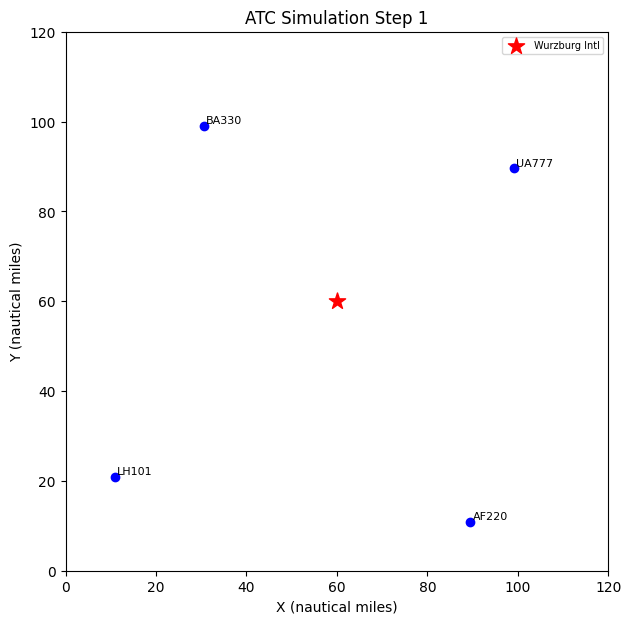


--- Step 2 ---
✅ No conflicts detected.


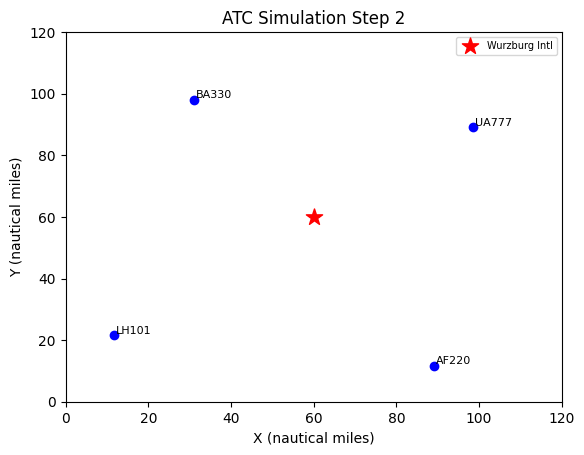


--- Step 3 ---
✅ No conflicts detected.


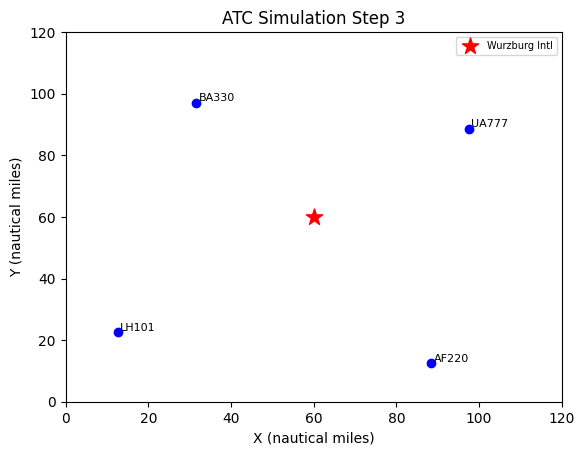


--- Step 4 ---
✅ No conflicts detected.


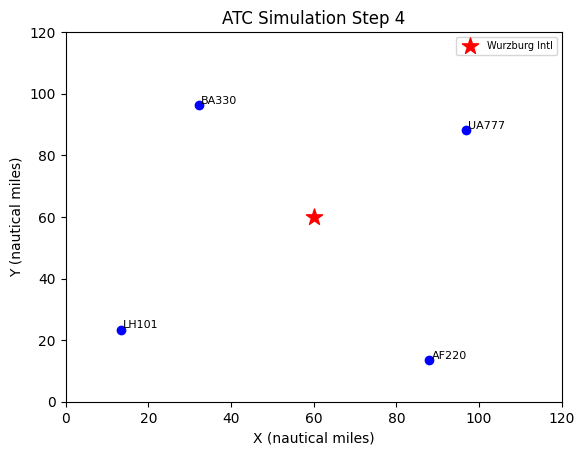


--- Step 5 ---
✅ No conflicts detected.


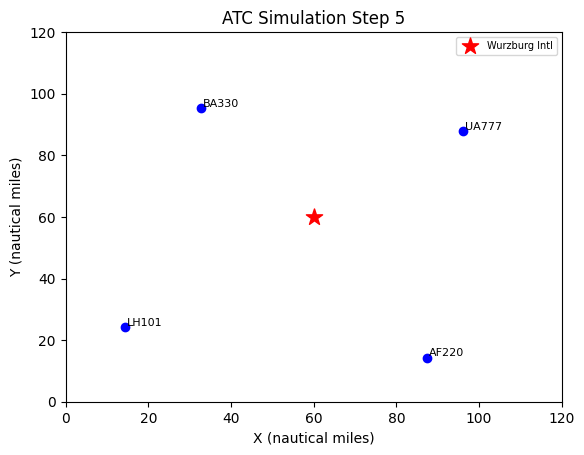


--- Step 6 ---
✅ No conflicts detected.


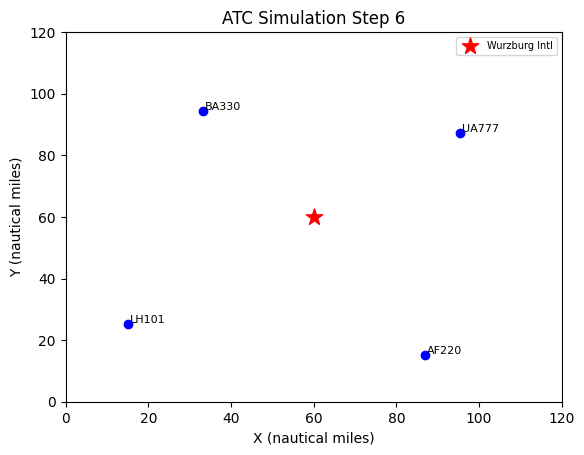


--- Step 7 ---
✅ No conflicts detected.


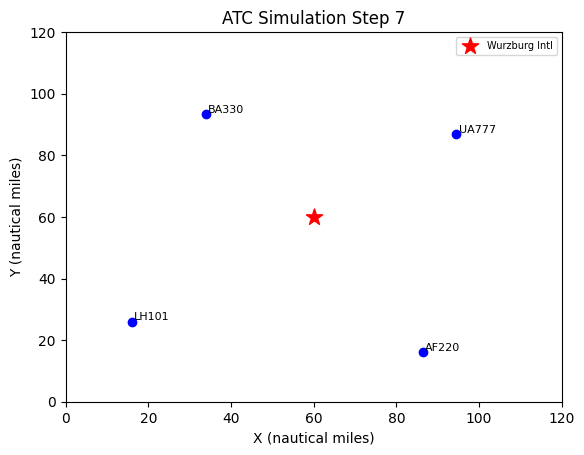


--- Step 8 ---
✅ No conflicts detected.


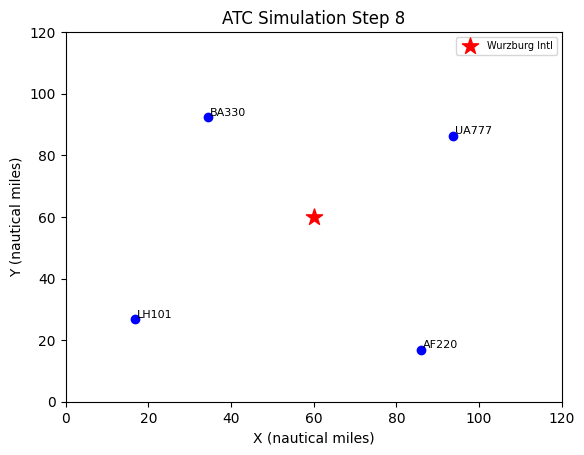


--- Step 9 ---
✅ No conflicts detected.


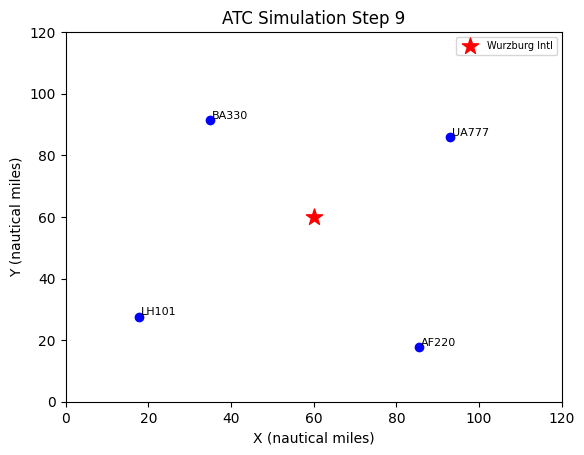


--- Step 10 ---
✅ No conflicts detected.


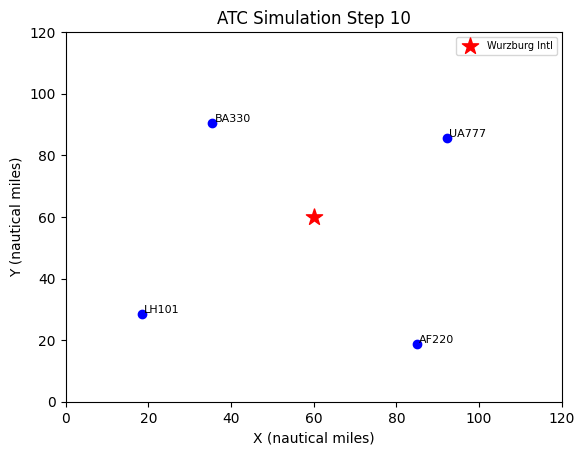


--- Step 11 ---
✅ No conflicts detected.


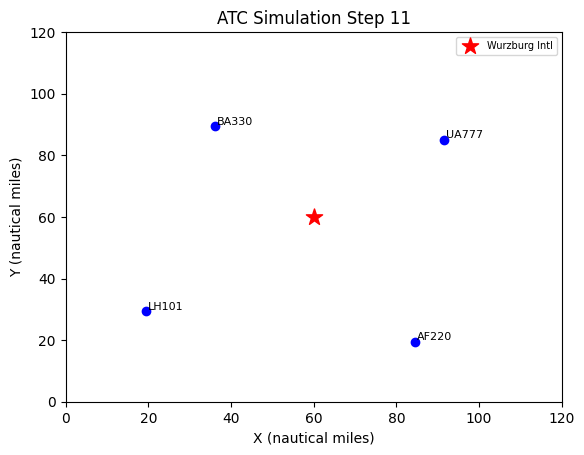


--- Step 12 ---
✅ No conflicts detected.


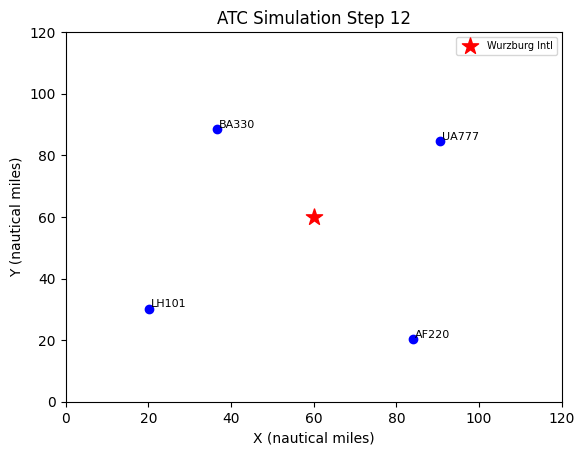


--- Step 13 ---
✅ No conflicts detected.


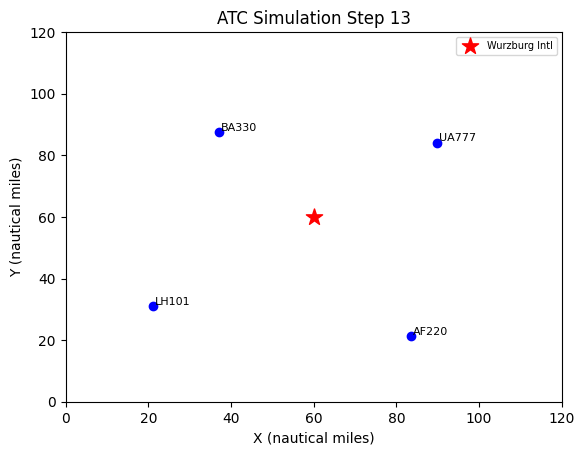


--- Step 14 ---
✅ No conflicts detected.


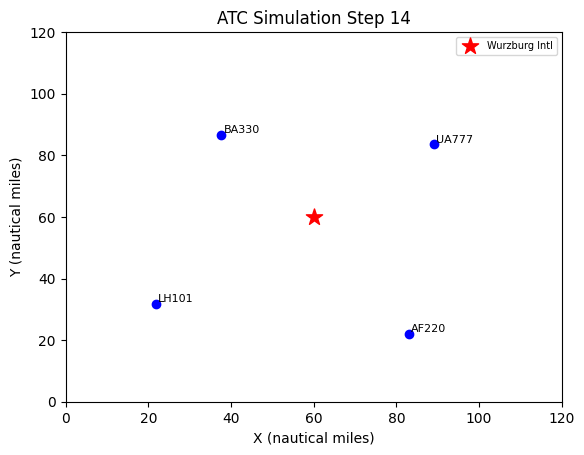


--- Step 15 ---
✅ No conflicts detected.


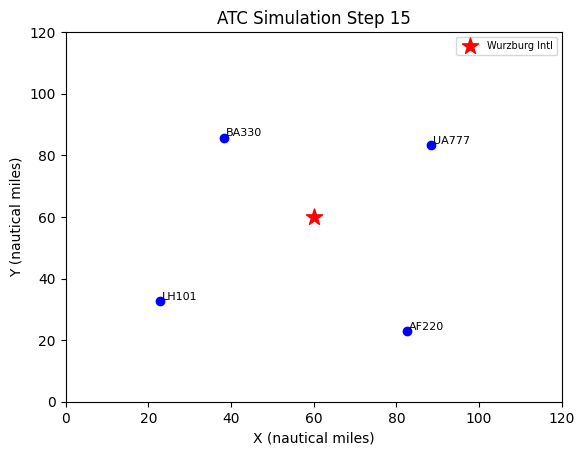


--- Step 16 ---
✅ No conflicts detected.


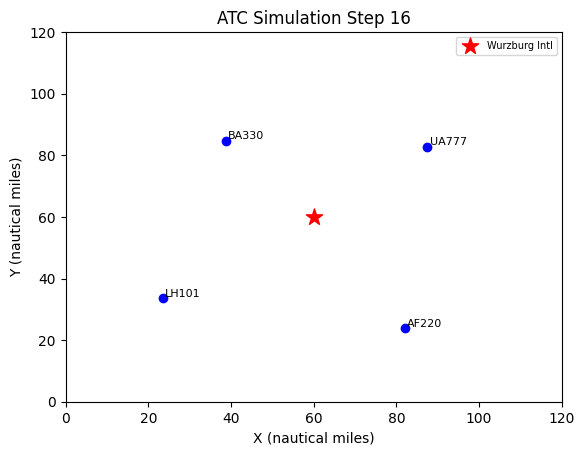


--- Step 17 ---
✅ No conflicts detected.


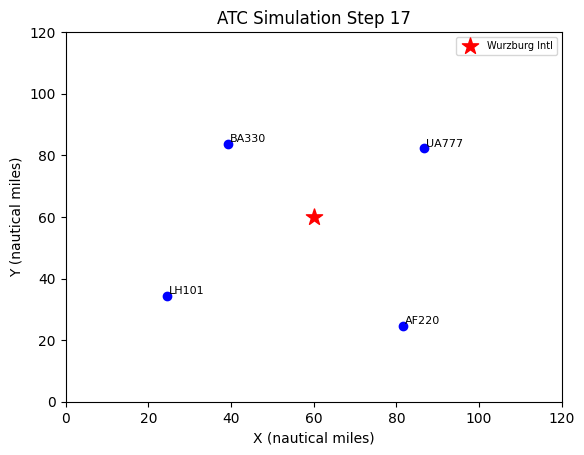


--- Step 18 ---
✅ No conflicts detected.


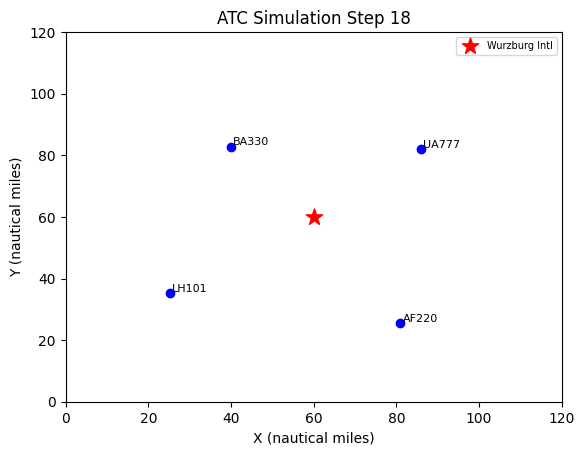


--- Step 19 ---
✅ No conflicts detected.


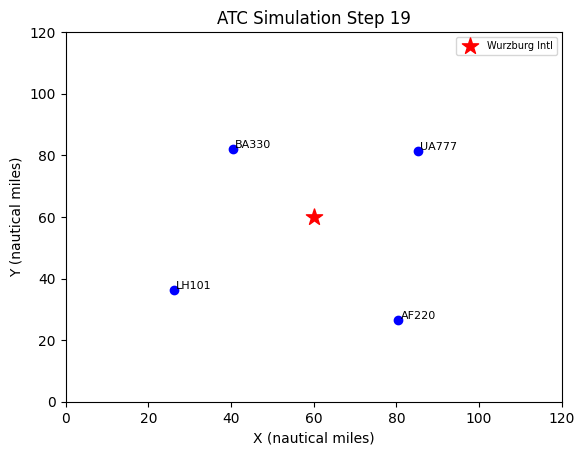


--- Step 20 ---
✅ No conflicts detected.


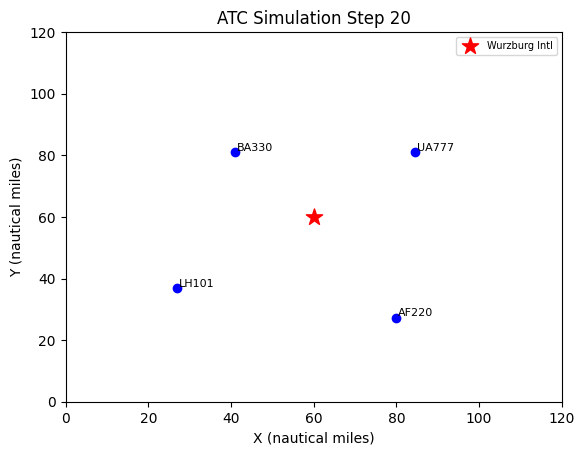


--- Step 21 ---
✅ No conflicts detected.


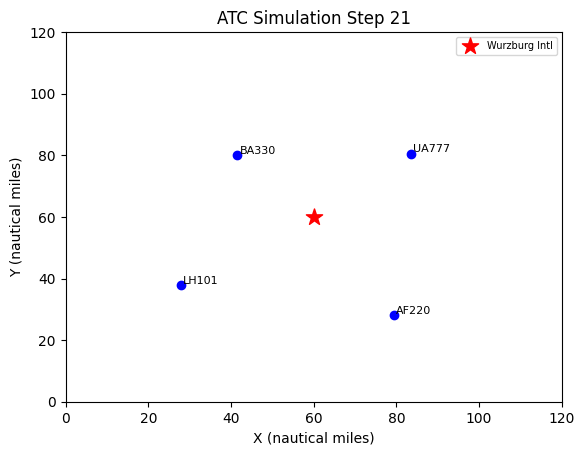


--- Step 22 ---
✅ No conflicts detected.


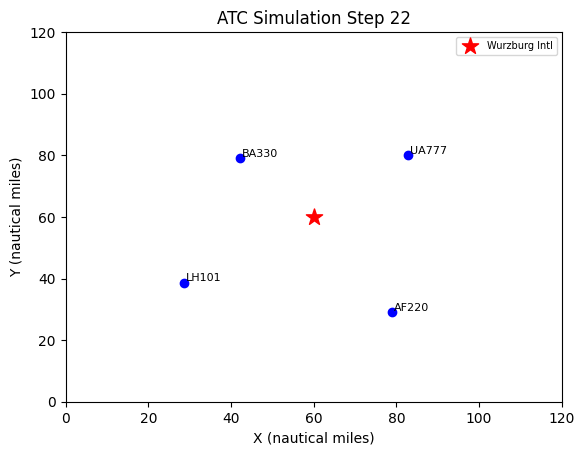


--- Step 23 ---
✅ No conflicts detected.


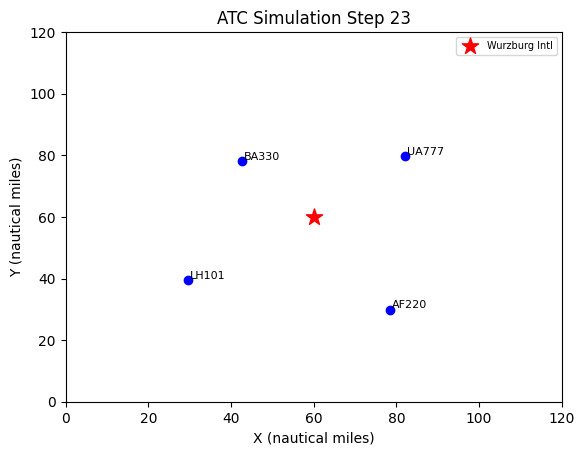


--- Step 24 ---
✅ No conflicts detected.


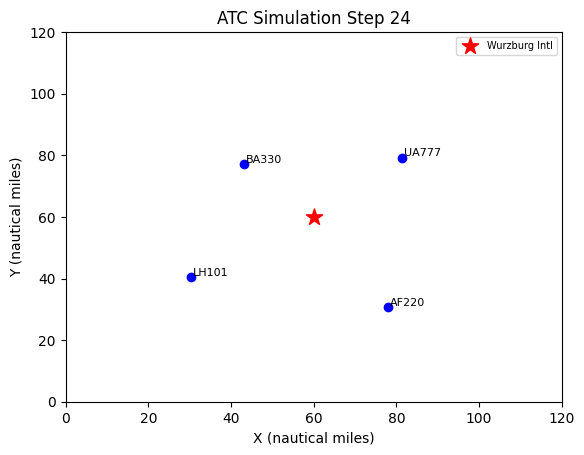


--- Step 25 ---
✅ No conflicts detected.


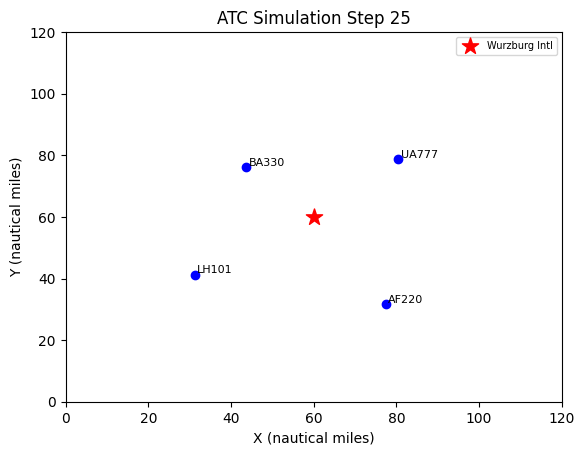


--- Step 26 ---
✅ No conflicts detected.


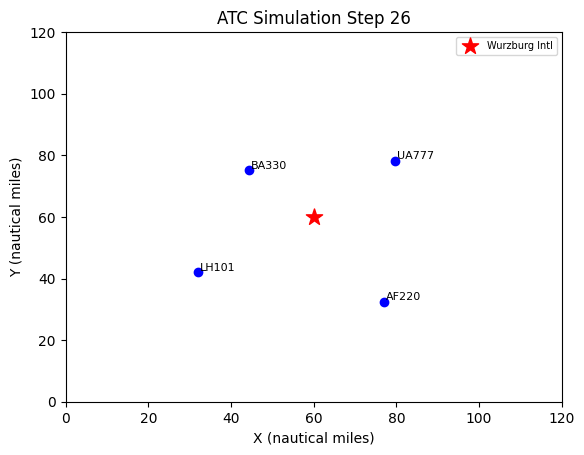


--- Step 27 ---
✅ No conflicts detected.


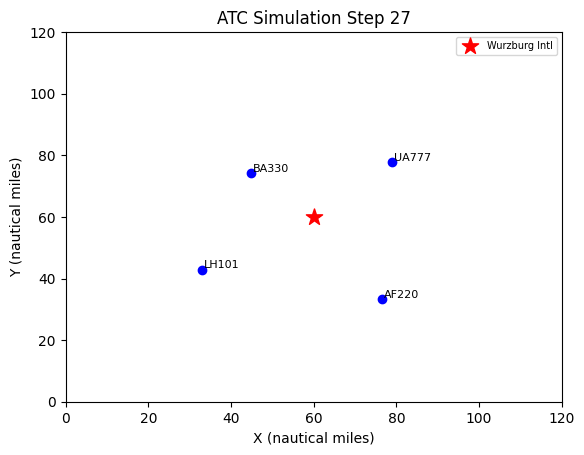


--- Step 28 ---
✅ No conflicts detected.


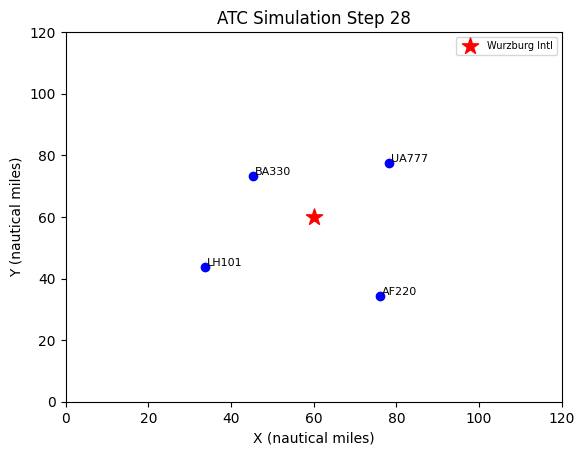


--- Step 29 ---
✅ No conflicts detected.


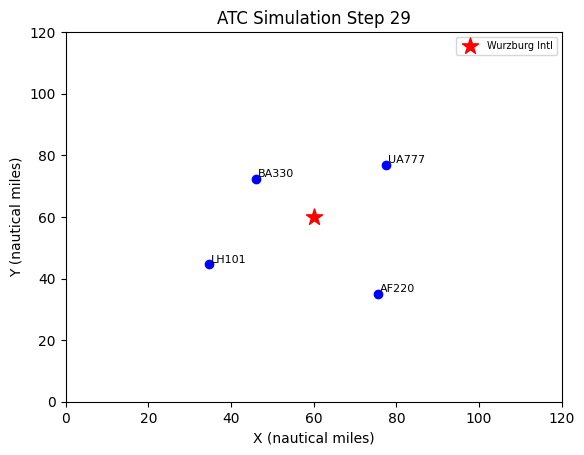


--- Step 30 ---
✅ No conflicts detected.


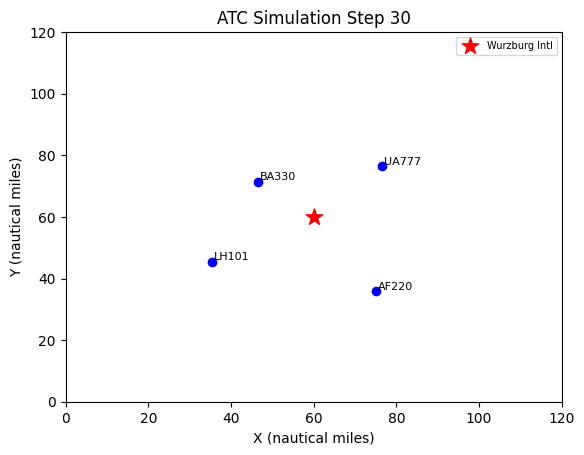


--- Step 31 ---
✅ No conflicts detected.


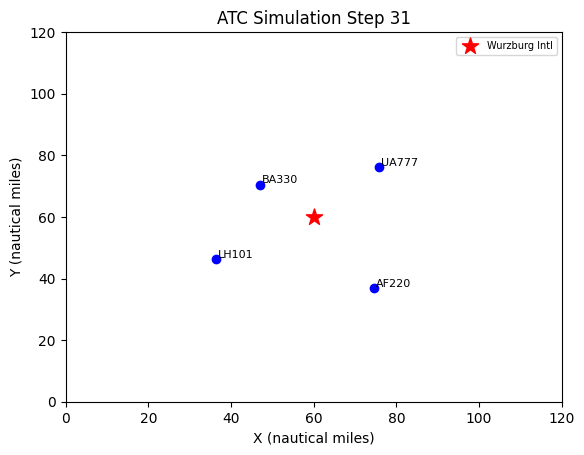


--- Step 32 ---
✅ No conflicts detected.


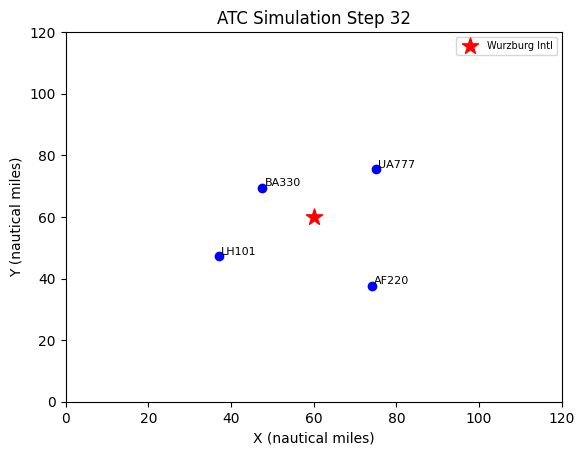


--- Step 33 ---
✅ No conflicts detected.


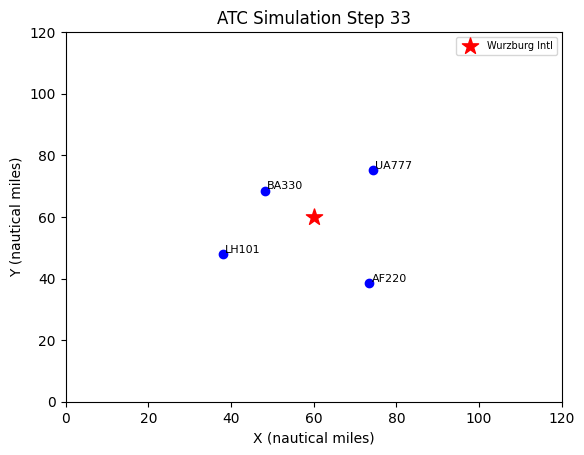


--- Step 34 ---
✅ No conflicts detected.


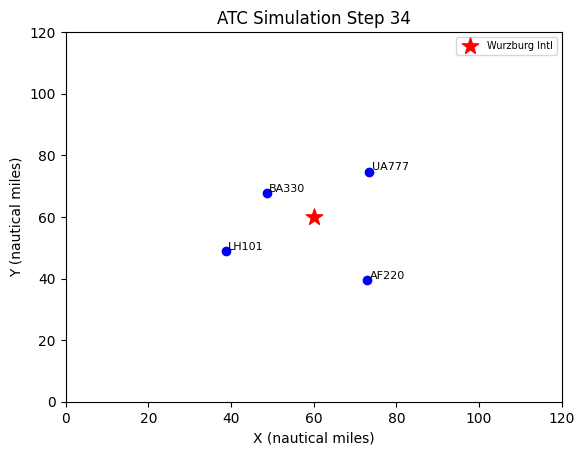


--- Step 35 ---
✅ No conflicts detected.


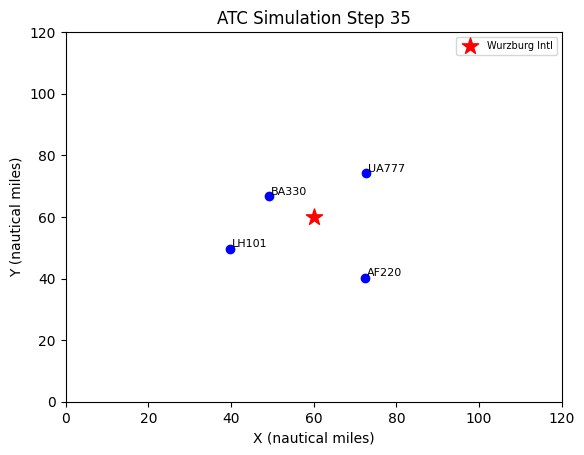


--- Step 36 ---
✅ No conflicts detected.


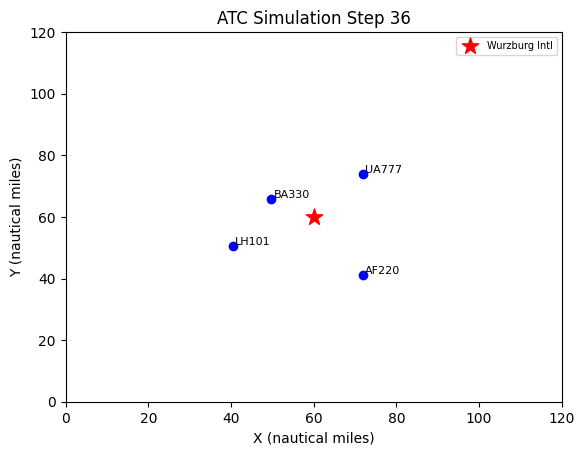


--- Step 37 ---
✅ No conflicts detected.


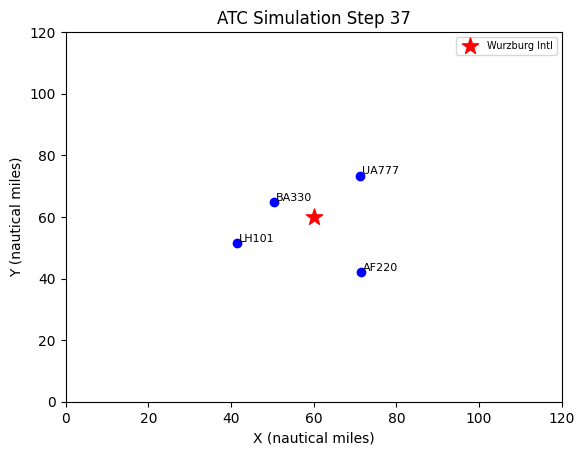


--- Step 38 ---
🛬 BA330 cleared to land at Wurzburg Intl on Runway 27
✅ No conflicts detected.


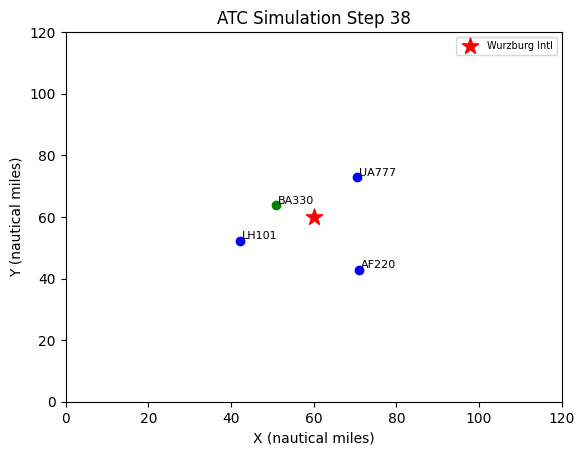


--- Step 39 ---
✅ No conflicts detected.


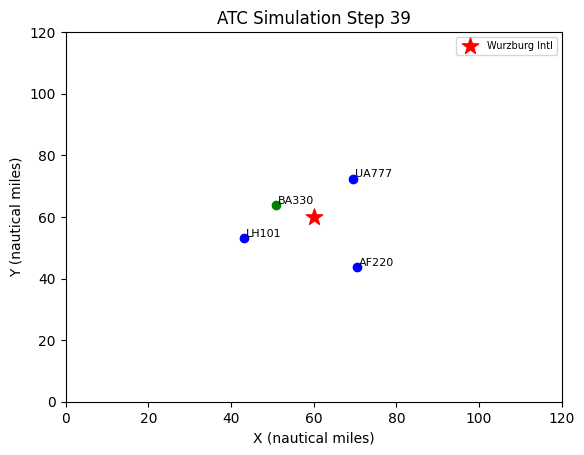


--- Step 40 ---
✅ No conflicts detected.


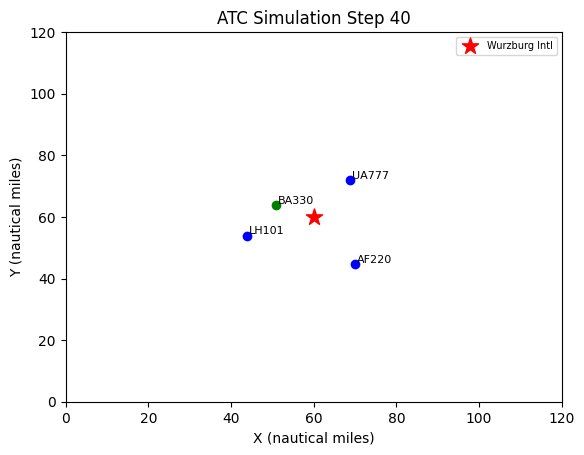


--- Step 41 ---
✅ No conflicts detected.


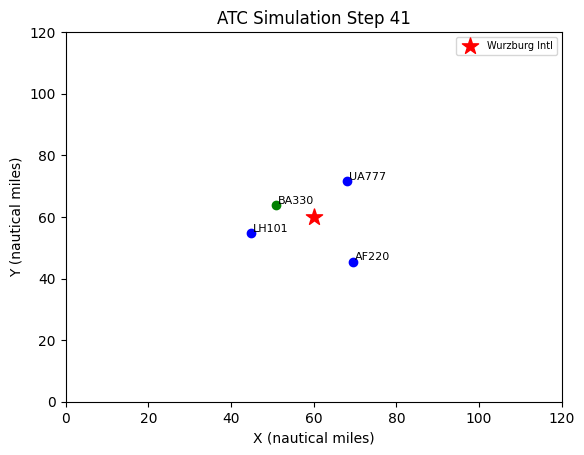


--- Step 42 ---
✅ No conflicts detected.


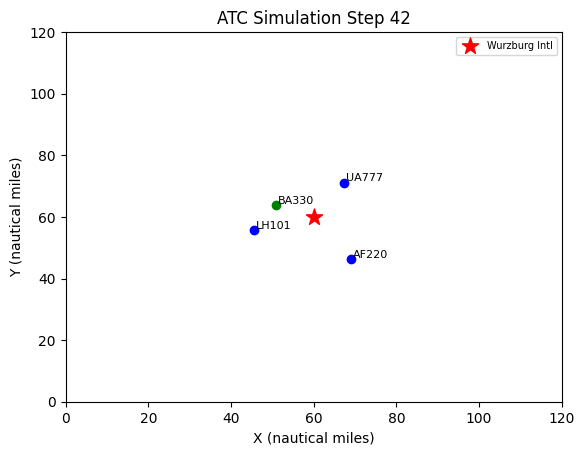


--- Step 43 ---
✅ No conflicts detected.


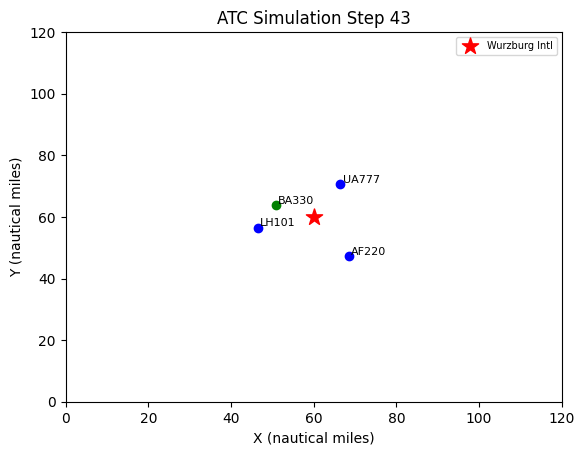


--- Step 44 ---
✅ No conflicts detected.


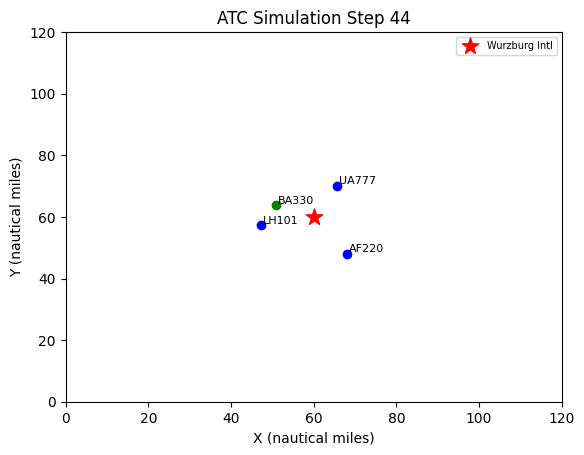


--- Step 45 ---
✅ No conflicts detected.


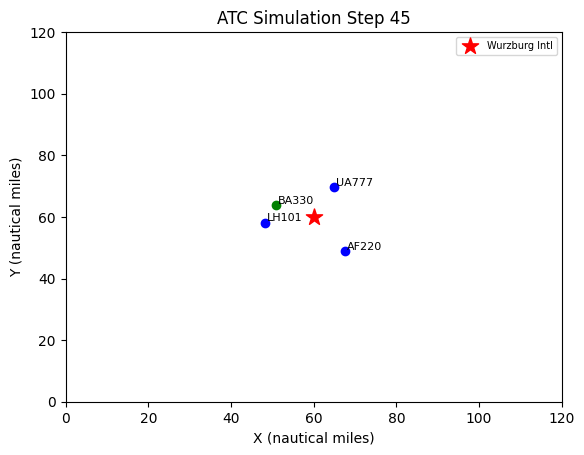


--- Step 46 ---
✅ No conflicts detected.


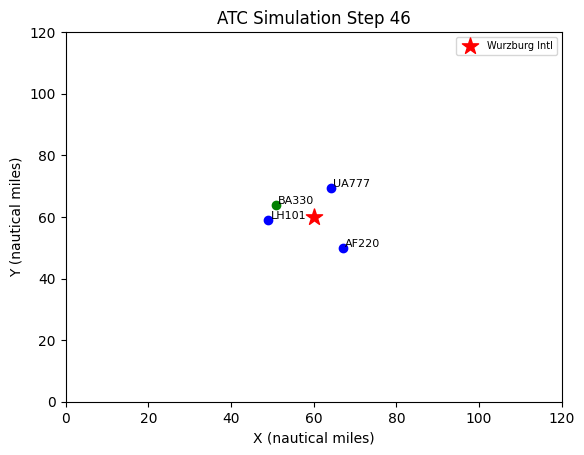


--- Step 47 ---
🛬 UA777 cleared to land at Wurzburg Intl on Runway 09
✅ No conflicts detected.


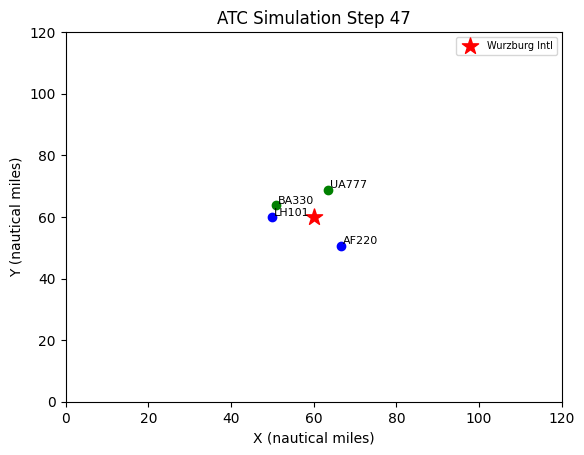


--- Step 48 ---
🛬 LH101 cleared to land at Wurzburg Intl on Runway 09
✅ No conflicts detected.


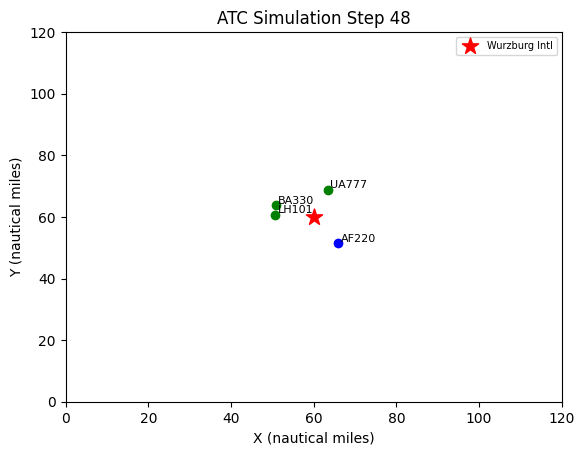


--- Step 49 ---
🛬 AF220 cleared to land at Wurzburg Intl on Runway 09
✅ No conflicts detected.


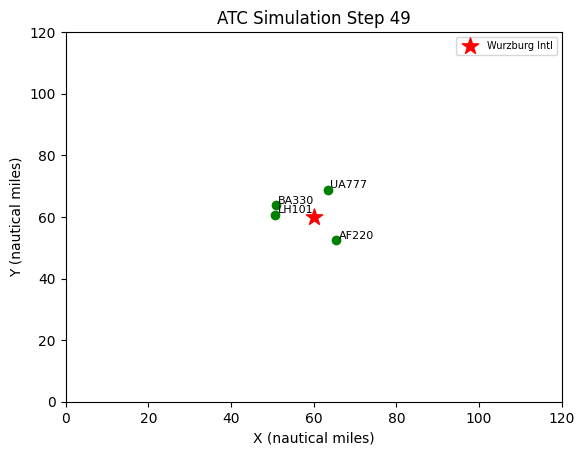


--- Step 50 ---
✅ No conflicts detected.


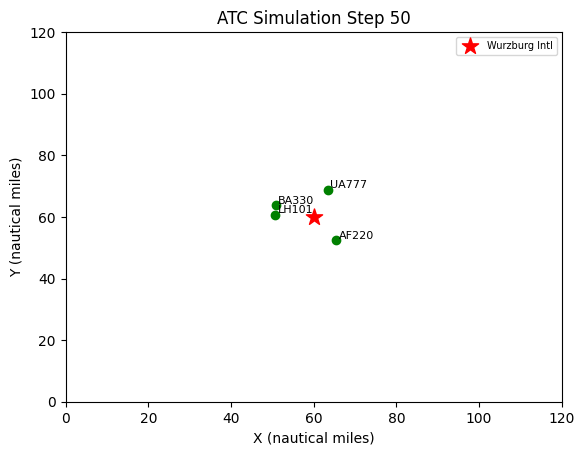


Simulation complete ✅


In [1]:
import math
import random
import time
import matplotlib.pyplot as plt

# Aircraft class
class Aircraft:
    def __init__(self, flight_id, x, y, altitude, speed, heading, destination):
        self.flight_id = flight_id
        self.x = x
        self.y = y
        self.altitude = altitude
        self.speed = speed
        self.heading = heading
        self.destination = destination
        self.status = "EN_ROUTE"
        self.landing_time = None

    def distance_to(self, target_x, target_y):
        return math.sqrt((self.x - target_x) ** 2 + (self.y - target_y) ** 2)

    def update_position(self):
        if self.status == "EN_ROUTE":
            rad = math.radians(self.heading)
            self.x += self.speed * math.cos(rad)
            self.y += self.speed * math.sin(rad)

    def change_altitude(self, new_altitude):
        self.altitude = new_altitude

    def __str__(self):
        return f"{self.flight_id}: ({self.x:.1f}, {self.y:.1f}) | Alt={self.altitude} ft | Heading={self.heading}° | {self.status}"


# Airport class
class Airport:
    def __init__(self, name, x, y, runways):
        self.name = name
        self.x = x
        self.y = y
        self.runways = runways
        self.landing_queue = []

    def schedule_landing(self, aircraft):
        aircraft.status = "LANDING"
        self.landing_queue.append(aircraft)
        aircraft.landing_time = len(self.landing_queue) * 3  # arbitrary time slot


# Conflict detection and resolution
def detect_conflicts(aircraft_list, threshold=5):
    conflicts = []
    for i in range(len(aircraft_list)):
        for j in range(i + 1, len(aircraft_list)):
            ac1, ac2 = aircraft_list[i], aircraft_list[j]
            horizontal_distance = ac1.distance_to(ac2.x, ac2.y)
            altitude_diff = abs(ac1.altitude - ac2.altitude)

            if horizontal_distance < threshold and altitude_diff < 1000:
                conflicts.append((ac1, ac2))
    return conflicts


def resolve_conflicts(conflicts):
    for ac1, ac2 in conflicts:
        print(f"⚠️ Conflict detected between {ac1.flight_id} and {ac2.flight_id}")
        # Simple resolution: adjust one aircraft's altitude
        ac2.change_altitude(ac2.altitude + 1000)
        print(f"→ ATC Command: {ac2.flight_id} climb to {ac2.altitude} ft to avoid conflict.")


# Visualization
def visualize_airspace(aircraft_list, airport, step):
    plt.clf()
    plt.scatter(airport.x, airport.y, c="red", marker="*", s=150, label=airport.name)

    for ac in aircraft_list:
        color = "blue" if ac.status == "EN_ROUTE" else "green"
        plt.scatter(ac.x, ac.y, c=color)
        plt.text(ac.x + 0.5, ac.y + 0.5, ac.flight_id, fontsize=8)

    plt.xlim(0, 120)
    plt.ylim(0, 120)
    plt.title(f"ATC Simulation Step {step}")
    plt.xlabel("X (nautical miles)")
    plt.ylabel("Y (nautical miles)")
    plt.legend(loc="upper right", fontsize=7)
    plt.pause(0.3)


# Main simulation
def main():
    airport = Airport("Wurzburg Intl", 60, 60, ["Runway 09", "Runway 27"])

    aircraft_list = [
        Aircraft("LH101", 10, 20, 35000, 1.2, 45, airport),
        Aircraft("AF220", 90, 10, 34000, 1.0, 120, airport),
        Aircraft("BA330", 30, 100, 36000, 1.1, 300, airport),
        Aircraft("UA777", 100, 90, 33000, 0.9, 210, airport),
    ]

    plt.figure(figsize=(7, 7))

    for step in range(1, 51):
        print(f"\n--- Step {step} ---")
        for ac in aircraft_list:
            ac.update_position()

            # If close to airport → begin landing
            if ac.distance_to(airport.x, airport.y) < 10 and ac.status == "EN_ROUTE":
                airport.schedule_landing(ac)
                print(f"🛬 {ac.flight_id} cleared to land at {airport.name} on {random.choice(airport.runways)}")

        # Detect and resolve conflicts
        conflicts = detect_conflicts(aircraft_list)
        if conflicts:
            resolve_conflicts(conflicts)
        else:
            print("✅ No conflicts detected.")

        # Update landing queue
        for ac in airport.landing_queue:
            ac.change_altitude(max(0, ac.altitude - 2000))
            if ac.altitude <= 0:
                ac.status = "LANDED"
                print(f"✅ {ac.flight_id} has landed successfully.")

        # Visualize
        visualize_airspace(aircraft_list, airport, step)
        time.sleep(0.2)

    plt.show()
    print("\nSimulation complete ✅")


if __name__ == "__main__":
    main()
